In [3]:
import sys
sys.path.append('/Users/gbibim/Here/hpt')

# List all modules and packages available at this path
import os
print(os.listdir('/Users/gbibim/Here/hpt'))

from hpt import utils

#import mplhep as hep
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import mplhep as hep

import hist

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 12})
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["grid.color"] = "#CCCCCC"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["figure.edgecolor"] = "none"

# automatically reloads imported files on edits
%load_ext autoreload
%autoreload 2

['pT_xjj0p9_newweight.png', 'PT_xbb0p95_reweighted.png', 'output_xbb0p7.png', 'outparquet', 'output_xbb0p95.png', '.DS_Store', '0-1.parquet', 'ROC_curves.ipynb', 'LICENSE', 'requirements.txt', 'mSDstacks_xbb_tw_xcs_rocs_Dec92024.pdf', 'ZJets.ipynb', 'mSD_xjj0p9_newweight.png', 'output_xjj0p7.png', 'mSDstacks_xbb_tw_xcs_rocs.pdf', 'Discriminators.ipynb', 'pyproject.toml', 'mSD_xbb0p9_reweighted.png', 'mSD_xbb0p95_reweighted.png', '.sites_map.json', 'output_xbb0p95_nokfactor.png', 'PT_xjj0p9_reweighted.png', 'mSD_xbb0p7_reweighted.png', 'README.md', 'output_xbb0p7_nokfactor.png', 'output_xbb0p95_kfactor.png', 'output_xjj0p7_nokfactor.png', '.gitignore', 'output_xjj0p95.png', 'schedule.key', 'output_xjj0p9.png', 'print_parquet.py', 'outfiles', 'mSD_xjj0p9_reweighted.png', 'PT_xbb0p7_reweighted.png', 'Untitled.key', '.git', 'data', 'output_xjj0p95_nokfactor.png', 'PT_xbb0p9_reweighted.png', 'output_xbb0p9.png', 'HiggsDiscriminators.ipynb', 'mSDplot.ipynb', 'output_xbb0p9_nokfactor.png', 's

In [5]:
import pandas as pd
import uproot
import numpy as np

# Load your dataset (update the file path as needed)
#df = pd.read_parquet('/Users/gbibim/Here/genZ/data/PNetchildren/2023/0-1.parquet')
df = pd.read_parquet('/Users/gbibim/Here/genZ/data/PNetchildren/2023/QCD_HT-1000to1200/parquet/out_0.parquet')

# Inspect the data
df.head()

ak8FatJetEta           ak8FatJetPhi           ak8FatJetMass            \
             0         1            0         1             0         1   
0     0.554565  0.210388    -0.657715  2.619141      137.6250   54.8750   
1    -1.105469 -0.399902     1.158936 -1.846436      118.4375   98.3125   
2    -0.311707  1.451416     0.299866 -2.933594      121.5000   47.4375   
3    -2.116699 -1.655518     2.480469 -0.600342       85.8125  198.2500   
4    -1.467529 -0.613403    -0.122742  3.012207       91.1875  148.2500   

  ak8FatJetPt         ak8FatJetPNetTXbb            ...  \
            0       1                 0         1  ...   
0      472.00  306.00          0.114014  0.502441  ...   
1      529.50  379.25          0.000044  0.001189  ...   
2      451.75  302.25          0.008621  0.032196  ...   
3      534.50  498.00          0.000055  0.040588  ...   
4      540.50  524.50          0.003210  0.000512  ...   

  AK8PFJet425_SoftDropMass40 AK8PFJet400_SoftDropMass40  \
                           0                          0   
0                          1                      False   
1                          1                      False   
2                          1                      False   
3                          1                      False   
4                          1                      False   

  AK8DiPFJet250_250_MassSD50 AK8DiPFJet260_260_MassSD30 AK8PFJet420_MassSD30  \
                           0                          0                    0   
0                          0                          0                    1   
1                          1                          1                    1   
2                          1                          1                    1   
3                          0                          1                    1   
4                          1                          1                    1   

  AK8PFJet230_SoftDropMass40_PNetBB0p06 AK8PFJet230_SoftDropMass40_PNetBB0p10  \
                                      0                                     0   
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     0                                     0   
4                                     0                                     0   

  AK8PFJet250_SoftDropMass40_PNetBB0p06        weight weight_noxsec  
                                      0             0             0  
0                                     0  1.773942e+11  11432.900391  
1                                     0  1.773942e+11  11432.900391  
2                                     0  1.773942e+11  11432.900391  
3                                     0  1.773942e+11  11432.900391  
4                                     0  1.773942e+11  11432.900391  

[5 rows x 76 columns]

In [36]:
pass_region = df["ak8FatJetParTPXbb"][0] > 0.95  # Adjust threshold if needed
fail_region = ~pass_region  # Events that fail the selection

In [37]:
df["rho"] = 2 * np.log(df["ak8FatJetmsoftdrop"][0] / df["ak8FatJetPt"][0])

/Users/gbibim/Here/micromamba/envs/new-env/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/gbibim/Here/micromamba/envs/new-env/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [38]:
bins_msd = np.linspace(40, 201, 24)  # Soft Drop Mass bins
bins_rho = np.linspace(-6, -1, 20)   # Rho bins
bins_pt = np.linspace(200, 1000, 25)  # Jet pT bins
bins_qcd = np.linspace(0, 1, 20)      # ParticleNet QCD Score bins

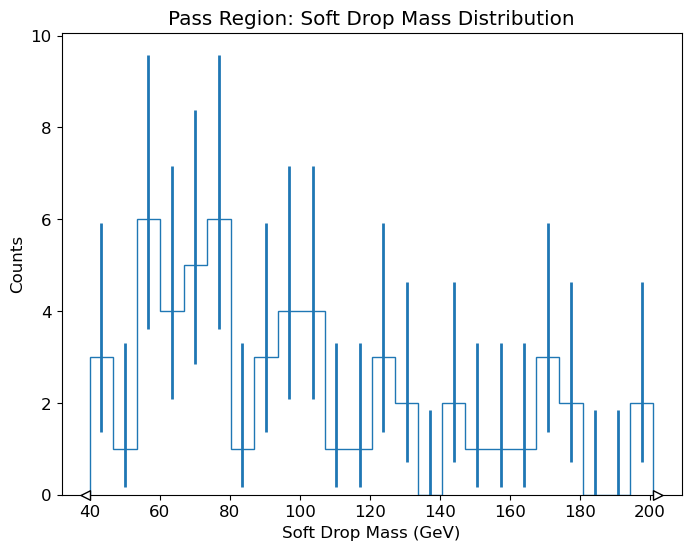

In [41]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(8, 6))

h_pass.project("msd").plot1d(ax=ax)

ax.set_title("Pass Region: Soft Drop Mass Distribution")
ax.set_xlabel("Soft Drop Mass (GeV)")
ax.set_ylabel("Counts")

plt.show()

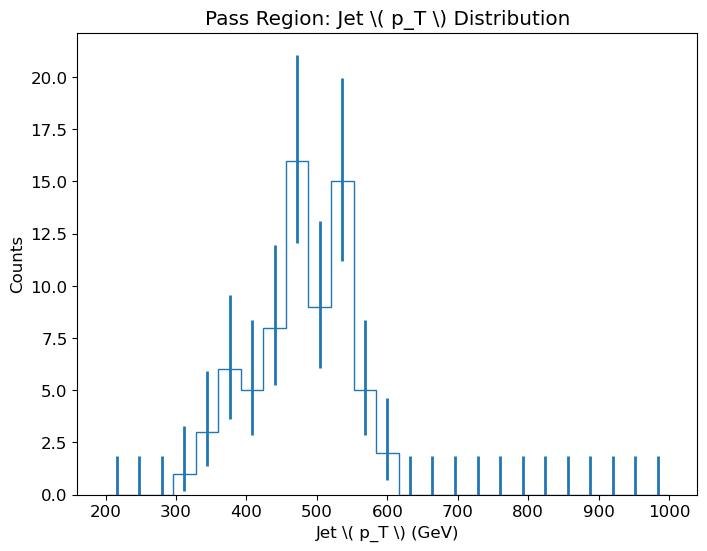

In [42]:
fig, ax = plt.subplots(figsize=(8, 6))

h_pass.project("pt").plot1d(ax=ax)

ax.set_title("Pass Region: Jet \( p_T \) Distribution")
ax.set_xlabel("Jet \( p_T \) (GeV)")
ax.set_ylabel("Counts")

plt.show()

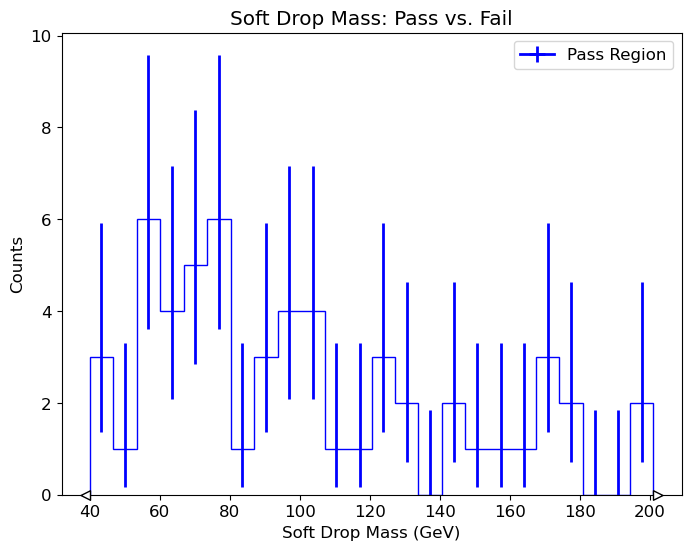

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

h_pass.project("msd").plot1d(ax=ax, label="Pass Region", color="blue")
h_fail.project("msd").plot1d(ax=ax, label="Fail Region", color="red")

ax.set_title("Soft Drop Mass: Pass vs. Fail")
ax.set_xlabel("Soft Drop Mass (GeV)")
ax.set_ylabel("Counts")
ax.legend()

plt.show()